# Ensemble Techniques


  -  1. Load the data (Parkinson.csv) file and perform the following task, 
        - a) Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers.
        - b) Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3.
      -  c) Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.
      -  d) Comment on (c), whether boosting is improving the model performance or not.
      -  e) Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score.
      -  f) Comment on (e), whether bagging is improving the model performance or not.
      -  g) Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.
      -  h) Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.





## Attributes Information:: 
- name - ASCII subject name and recording number 
- MDVP:Fo(Hz) - Average vocal fundamental frequency 
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
- DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

## Import packages

In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
import itertools
import matplotlib.patches as mpatches
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('fivethirtyeight')

## Read the data

In [177]:
df = pd.read_csv('parkinson.csv')

In [178]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## a) Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers.

In [4]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [34]:
df.shape

(195, 24)

**Attaching suitable headers to the columns:**

In [179]:
df.columns = ['name', 'MDVP_Fo', 'MDVP_Fhi', 'MDVP_Flo','MDVP_JitterPer',
       'MDVP_JitterAbs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP',
       'MDVP_Shimmer', 'MDVP_ShimmerdB', 'Shimmer_APQ3', 'Shimmer_APQ5',
       'MDVP_APQ', 'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [7]:
df.head()

,name,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_JitterPer,MDVP_JitterAbs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## b) Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3.

**Check for missing values**

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
total

PPE               0
D2                0
MDVP_Fo           0
MDVP_Fhi          0
MDVP_Flo          0
MDVP_JitterPer    0
MDVP_JitterAbs    0
MDVP_RAP          0
MDVP_PPQ          0
Jitter_DDP        0
MDVP_Shimmer      0
MDVP_ShimmerdB    0
Shimmer_APQ3      0
Shimmer_APQ5      0
MDVP_APQ          0
Shimmer_DDA       0
NHR               0
HNR               0
status            0
RPDE              0
DFA               0
spread1           0
spread2           0
name              0
dtype: int64

There are no missing values in the dataset.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP_Fo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP_Fhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP_Flo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP_JitterPer,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP_JitterAbs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP_RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP_PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter_DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP_Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP_ShimmerdB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


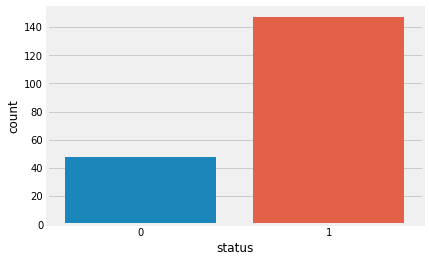

In [12]:
sns.countplot(x='status', data=df)

**‘0’ – healthy and ‘1’ – Parkinson Disease. We can see that the data is imbalanced with patients having Parkinson Disease way more than the healthy patients.**

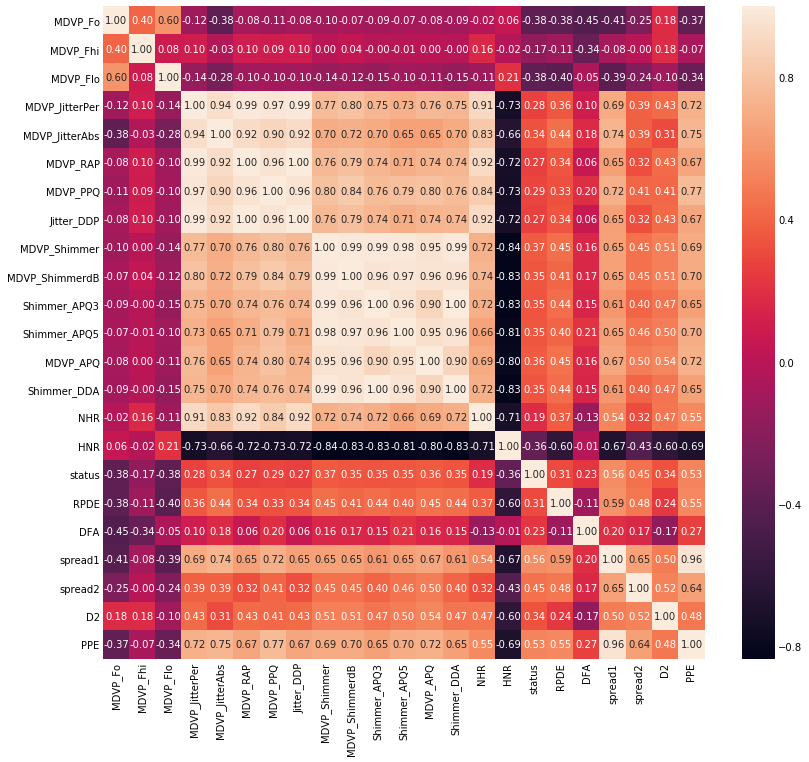

In [9]:
#correlation data
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt=".2f")
plt.xticks(rotation=90)
plt.show()

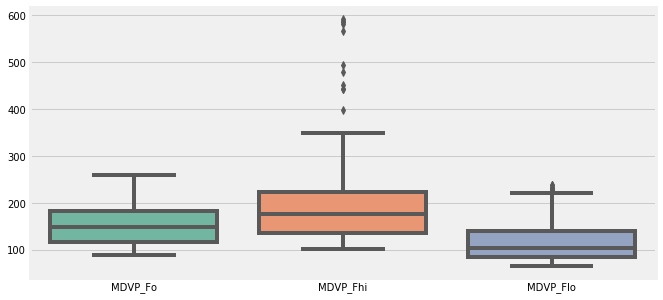

In [33]:
fig = plt.figure(figsize = (10,5))
ax = sns.boxplot(data=df.iloc[:,0:4], palette="Set2")

In [180]:
df = df.drop(labels= "name" , axis = 1)

In [181]:
y = df.status.values
X = df.drop(labels= "status" , axis = 1)

In [182]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [183]:
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

## Train Test Split

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [185]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 22), (59, 22), (136,), (59,))

## LOGISTIC REGRESSION:

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


**Confusion Matrix:**

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  5]
 [ 2 42]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.89      0.95      0.92        44

   micro avg       0.88      0.88      0.88        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.88      0.88      0.88        59



**ROC Curve**

A more visual way to measure the performance of a binary classifier is the receiver operating characteristic (ROC) curve. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR).

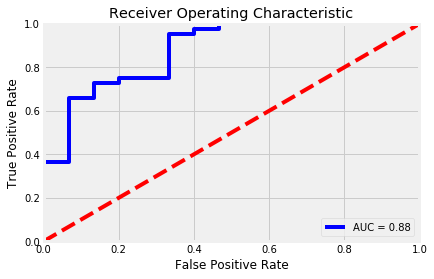

In [68]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**AUC Score**

In [78]:
print('AUC = %0.2f' % roc_auc)

AUC = 0.88


## Naive’s Bayes:

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7627118644067796


**Confusion Matrix:**

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  3]
 [11 33]]


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.83        44

   micro avg       0.76      0.76      0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59



**ROC Curve**

In [75]:
y_pred_prob = nb.predict_proba(X_test)[:,1]

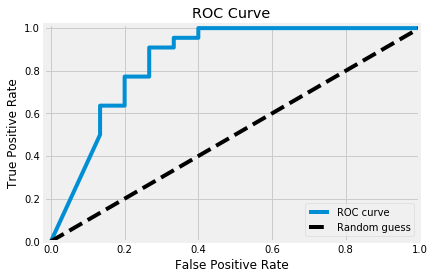

In [76]:
from sklearn.metrics import roc_curve
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

**AUC Score**

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.8515151515151516

## KNN

In [92]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

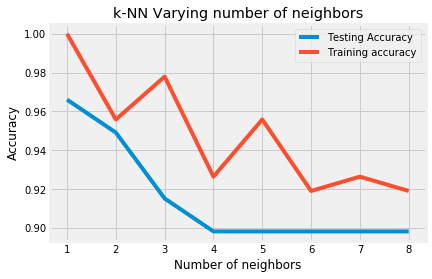

In [93]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [200]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [201]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


**Confusion Matrix:**

In [206]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[ 8  7]
 [ 1 43]]


In [207]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8,7,15
1,1,43,44
All,9,50,59


**Classification Report**

In [208]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

   micro avg       0.86      0.86      0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



**ROC Curve**

In [209]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

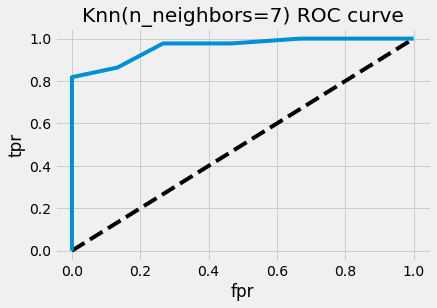

In [210]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

**AUC**

In [211]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9613636363636364

## c) Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

The best model we have got is LogisticRegression Model. Let's consider LogisticRegression model as our best model annd proceed with Boosting.

In [192]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

**Since KNN does not support AdaBoosting we can not perform AdaBoost on our best model. Let's consider LogisticRegression model as our best model, as it also predicted with a high accuracy score.**

In [193]:
tuned_parameters = [{'n_estimators': [100, 200, 500]}]

logreg_clf = LogisticRegression()

ada_clf = AdaBoostClassifier(logreg_clf)

clf = GridSearchCV(ada_clf,
                 tuned_parameters,
                 cv=5,
                 scoring='roc_auc')

clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 200, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [195]:
clf.best_score_

0.8831932773109245

In [196]:
clf.best_params_

{'n_estimators': 200}

Text(0.5,18.5,'Predicted label')

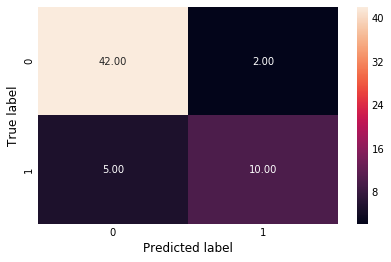

In [118]:
logreg_clf = LogisticRegression()

ada_clf = AdaBoostClassifier(logreg_clf, n_estimators = 200)

ada_clf.fit(X_train, y_train)

ada_test_pred = pd.DataFrame( { 'actual': y_test,
                            'predicted': ada_clf.predict(X_test) } )
bag_cm = metrics.confusion_matrix( ada_test_pred.actual, ada_test_pred.predicted, [1,0] )

sns.heatmap(bag_cm, annot=True,  fmt='.2f')


plt.ylabel('True label')
plt.xlabel('Predicted label')

In [104]:
gbcl = GradientBoostingClassifier(n_estimators = 101, random_state=1)
gbcl.fit(X_train,y_train)
print("GBCl on train data ", gbcl.score(X_train,y_train))
print("GBCl on test data ", gbcl.score(X_test,y_test))

GBCl on train data  1.0
GBCl on test data  0.9152542372881356


## d) Comment on (c), whether boosting is improving the model performance or not.

**We can see that after applying Boosting techniques on our LogisticRegression model, the validation accuracy has increased.**

**From 88% to 88.3%**

## e) Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score.

In [186]:
from sklearn.ensemble import BaggingClassifier

In [189]:
logreg_clf = LogisticRegression()
bag_clf = BaggingClassifier(logreg_clf, n_estimators = 2, max_features = 1.0, max_samples = 1.0 )
bag_clf.fit( X_train, y_train )
predict_proba_df = pd.DataFrame( bag_clf.predict_proba( X_test ) )
predict_proba_df.columns = ['prob_0', 'prob_1']
auc_score = metrics.roc_auc_score( y_test, predict_proba_df.prob_1  )
auc_score

0.9015151515151515

Text(0.5,18.5,'Predicted label')

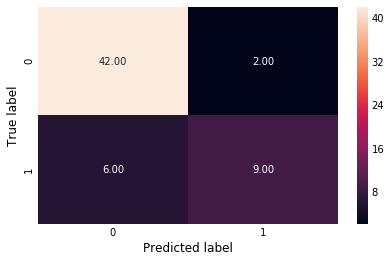

In [165]:
bag_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': bag_clf.predict( X_test ) } )
bag_cm = metrics.confusion_matrix( bag_test_pred.actual, bag_test_pred.predicted, [1,0] )

sns.heatmap(bag_cm, annot=True,  fmt='.2f' )


plt.ylabel('True label')
plt.xlabel('Predicted label')

## f) Comment on (e), whether bagging is improving the model performance or not.

**Using Bagging techniques we are getting a significant rise in our validation accuracy.**

**From 88% to 90.15%**

## g) Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

In [ ]:
# 5-fold cross validation to estimate accuracy (split data into 5 parts; use 4 parts to train and 1 for test)
num_folds = 5
num_instances = len(X_train)
seed = 7
# use the 'accuracy' metric to evaluate models (correct / total)
scoring = 'accuracy'

results = []
clf = LogisticRegression()
kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
cv_results = cross_validation.cross_val_score(clf, X_train, Y_train, cv = kfold, scoring = scoring)
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print("KNN")
print(accuracy_score(Y_validation, predictions)*100)
print(matthews_corrcoef(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [197]:
from sklearn.model_selection import cross_val_score
scores_adacl = cross_val_score(ada_clf, X, y, cv=5)

In [199]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_adacl.mean(), scores_adacl.std() * 2))

Accuracy: 0.80 (+/- 0.21)


In [190]:
from sklearn.model_selection import cross_val_score
scores_bgcl = cross_val_score(bag_clf, X, y, cv=5)

In [191]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bgcl.mean(), scores_bgcl.std() * 2))

Accuracy: 0.79 (+/- 0.14)


In [213]:
import pandas as pd
data = {'Model_Name':['LogReg', 'Naive Bayes', 'KNN', 'LogReg_Boosting','LogReg_Bagging','LogReg_BoostingCV','LogReg_BaggingCV'],'Accuracy':['0.88','0.85','0.864','0.883','0.9015','0.80 +/- 0.21','0.79 (+/- 0.14)']}
finScores = pd.DataFrame(data)
finScores

,Model_Name,Accuracy
0,LogReg,0.88
1,Naive Bayes,0.85
2,KNN,0.864
3,LogReg_Boosting,0.883
4,LogReg_Bagging,0.9015
5,LogReg_BoostingCV,0.80 +/- 0.21
6,LogReg_BaggingCV,0.79 (+/- 0.14)


## h) Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

**We have applied both bagging methods and boosting methods to our best model which was LogisticRegression model.**

**We should be considering the Bagging Opitimization which was applied on the Logistic Regression model, as in this scenario it provides the best accuracy scores, even after the Cross-Fold validation, and can be pushed to Production system**